In [1]:
# https://www.kaggle.com/zalando-research/fashionmnist
# !unzip '/content/zalando-mnist'

# 1. Implementation using sklearn

### 1) Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report

### 2) Load and Audit the Data

In [3]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [4]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


### 3) Prepare and Transform the Data

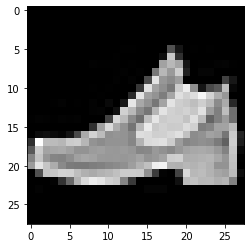

In [5]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1, 785)]
row_to_examine = 1
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
plt.imshow(image_data, cmap="gray")

**Split the data into train & test sets**

In [6]:
X_train, X_test, y_train, y_test = train.iloc[:, 1:], test.iloc[:, 1:], train['label'], test['label']

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### 4) Set up the Dense Layer Model

**Implement the Single Layer Perceptron. Evaluate performance and discuss reasons of failure**

In [8]:
#verbose: used to show specified level of detailed info while running the model
#f1-score: harmonic mean of precision and recall
per = Perceptron(verbose=1)
per.fit(X_train, y_train)
pred_per = per.predict(X_test)
cm_slp = confusion_matrix(y_test, pred_per)
clas_rep_slp = classification_report(y_test, pred_per)
print(cm_slp)
print(clas_rep_slp)

# We look for f1-score for each grayscale article image
# 0 - T-shirt/top
# 1 - Trouser
# 2 - Pullover
# 3 - Dress
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Ankle boot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 53484.58, NNZs: 783, Bias: -118.000000, T: 60000, Avg. loss: 303003.145533
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 66220.65, NNZs: 784, Bias: -211.000000, T: 120000, Avg. loss: 299339.494033
Total training time: 0.22 seconds.
-- Epoch 3
Norm: 72717.64, NNZs: 784, Bias: -294.000000, T: 180000, Avg. loss: 297653.234817
Total training time: 0.33 seconds.
-- Epoch 4
Norm: 79503.86, NNZs: 784, Bias: -392.000000, T: 240000, Avg. loss: 296942.270300
Total training time: 0.45 seconds.
-- Epoch 5
Norm: 86434.47, NNZs: 784, Bias: -500.000000, T: 300000, Avg. loss: 291319.301583
Total training time: 0.60 seconds.
-- Epoch 6
Norm: 91132.28, NNZs: 784, Bias: -619.000000, T: 360000, Avg. loss: 293538.012367
Total training time: 0.70 seconds.
-- Epoch 7
Norm: 94668.51, NNZs: 783, Bias: -717.000000, T: 420000, Avg. loss: 292032.014017
Total training time: 0.81 seconds.
-- Epoch 8
Norm: 98343.95, NNZs: 784, Bias: -827.000000, T: 480000, Avg. loss: 295443.732583
Total traini

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.3s finished


[[786   5  35 135  10   0   6   0  22   1]
 [  2 931  12  46   6   1   2   0   0   0]
 [ 21   2 765  33 166   0   5   0   8   0]
 [ 18   6  16 925  30   0   2   0   2   1]
 [  0   0  76  76 840   0   7   0   1   0]
 [  1   2   6   3   1 846   0  83   9  49]
 [201   1 152 153 292   0 180   0  21   0]
 [  0   0   0   0   0  15   0 957   1  27]
 [  5   1  22  10  12   7   6   5 932   0]
 [  0   0   0   0   1  12   0  72   2 913]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.98      0.93      0.96      1000
           2       0.71      0.77      0.73      1000
           3       0.67      0.93      0.78      1000
           4       0.62      0.84      0.71      1000
           5       0.96      0.85      0.90      1000
           6       0.87      0.18      0.30      1000
           7       0.86      0.96      0.90      1000
           8       0.93      0.93      0.93      1000
           9       0.92     

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
# start hidden_layer_sizes from (10, 10, 10) increase the size if accuracy increases along.
mlp = MLPClassifier(hidden_layer_sizes=(16, 16, 16), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)

Iteration 1, loss = 2.73500637
Iteration 2, loss = 1.86074645
Iteration 3, loss = 1.33492187
Iteration 4, loss = 1.09829158
Iteration 5, loss = 0.87209800
Iteration 6, loss = 0.79406162
Iteration 7, loss = 0.75149628
Iteration 8, loss = 0.72362883
Iteration 9, loss = 0.70731119
Iteration 10, loss = 0.68325650
Iteration 11, loss = 0.67126024
Iteration 12, loss = 0.66260032
Iteration 13, loss = 0.65494202
Iteration 14, loss = 0.64837079
Iteration 15, loss = 0.63626988
Iteration 16, loss = 0.63330656
Iteration 17, loss = 0.61732100
Iteration 18, loss = 0.61215393
Iteration 19, loss = 0.61090321
Iteration 20, loss = 0.60098340
Iteration 21, loss = 0.59747202
Iteration 22, loss = 0.59596534
Iteration 23, loss = 0.59269738
Iteration 24, loss = 0.58683074
Iteration 25, loss = 0.58278845
Iteration 26, loss = 0.57753742
Iteration 27, loss = 0.58002234
Iteration 28, loss = 0.57448235
Iteration 29, loss = 0.56974053
Iteration 30, loss = 0.57177233
Iteration 31, loss = 0.57006091
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [11]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
clasrep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(clasrep_mlp)

[[811   0  14  58   5   1 105   0   6   0]
 [  2 948  18  26   2   1   3   0   0   0]
 [ 16   3 789  13 123   0  47   0   8   1]
 [ 34  12  11 867  41   0  31   1   2   1]
 [  1   1 107  33 829   0  23   0   6   0]
 [  0   0   0   1   1 918   1  46   4  29]
 [199   2 116  40 183   0 451   0   9   0]
 [  0   0   0   0   0  17   0 946   7  30]
 [ 11   0   6   9  14   6  20   4 930   0]
 [  0   0   0   1   1  12   0  53   0 933]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.98      0.95      0.96      1000
           2       0.74      0.79      0.77      1000
           3       0.83      0.87      0.85      1000
           4       0.69      0.83      0.75      1000
           5       0.96      0.92      0.94      1000
           6       0.66      0.45      0.54      1000
           7       0.90      0.95      0.92      1000
           8       0.96      0.93      0.94      1000
           9       0.94     

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), verbose=1, random_state=123)
mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)

Iteration 1, loss = 2.16751029
Iteration 2, loss = 0.86793479
Iteration 3, loss = 0.74162533
Iteration 4, loss = 0.68564355
Iteration 5, loss = 0.65340324
Iteration 6, loss = 0.62848007
Iteration 7, loss = 0.61304280
Iteration 8, loss = 0.58613786
Iteration 9, loss = 0.58060241
Iteration 10, loss = 0.56986100
Iteration 11, loss = 0.56447204
Iteration 12, loss = 0.55500876
Iteration 13, loss = 0.55075401
Iteration 14, loss = 0.54829313
Iteration 15, loss = 0.54568231
Iteration 16, loss = 0.53818207
Iteration 17, loss = 0.53693517
Iteration 18, loss = 0.53546597
Iteration 19, loss = 0.53263543
Iteration 20, loss = 0.51887924
Iteration 21, loss = 0.48967392
Iteration 22, loss = 0.47720803
Iteration 23, loss = 0.46758141
Iteration 24, loss = 0.46345507
Iteration 25, loss = 0.45809277
Iteration 26, loss = 0.45558283
Iteration 27, loss = 0.45095410
Iteration 28, loss = 0.44369901
Iteration 29, loss = 0.44528940
Iteration 30, loss = 0.44267228
Iteration 31, loss = 0.44002375
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [13]:
cm_mlp = confusion_matrix(y_test, preds_mlp)
clasrep_mlp = classification_report(y_test, preds_mlp)
print(cm_mlp)
print(clasrep_mlp)

[[809   5  17  33   4   2 120   0   9   1]
 [  4 975   2  11   6   0   1   0   1   0]
 [ 14   0 768  12 130   0  74   0   2   0]
 [ 22  21   9 846  82   1  17   0   2   0]
 [  1   1  87  13 821   1  71   0   4   1]
 [  4   1   0   0   0 925   0  40   5  25]
 [151   5  87  31 102   0 611   0  13   0]
 [  0   0   0   0   0  23   0 935   3  39]
 [  5   1   4   2   3   2  22   5 955   1]
 [  0   0   0   0   0   8   0  45   1 946]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.97      0.97      1000
           2       0.79      0.77      0.78      1000
           3       0.89      0.85      0.87      1000
           4       0.72      0.82      0.76      1000
           5       0.96      0.93      0.94      1000
           6       0.67      0.61      0.64      1000
           7       0.91      0.94      0.92      1000
           8       0.96      0.95      0.96      1000
           9       0.93     

# 2. Implementation using Keras

### 1) Import Libraries

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

Convert Y into one hot encode

In [15]:
y_train_tc = to_categorical(y_train)
y_test_tc = to_categorical(y_test)

In [16]:
print(y_train_tc.shape)
print(y_test_tc.shape)

(60000, 10)
(10000, 10)


### 2) Initialize the model & Set up the layers

**Using SGD**

In [17]:
model = Sequential()
#Input Layer
model.add(Dense(16, activation='relu', input_dim=(784)))  #16 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 16 is added for 16 neurons
#784 x 16 = weights x neurons = 12544 + 16 biases = 12560
#dense 16 x dense_1 16 + 16 biases = 272
#dense_1 16 x dense_2 16 + 16 biases = 272
#dense_2 16 x dense_3 10 + 16 biases = 170
#Total Biases & Weights/Params = 13,274 are updated, each time in Backpropagation
#Step: 1 Batch (Eg: 10 images batch) iteration and accuracy calculation
#Epoch: 1 time all the batches iterations complete i.e All images or pixels.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#'categorical_entropy': Sum(actualY*log(predictY))

In [19]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 8s - loss: 68.2040 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000 - 8s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 5s - loss: 2.3026 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000 - 5s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 6s - loss: 2.3026 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 6s - loss: 2.3026 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000 - 6s/epoch - 3ms/step

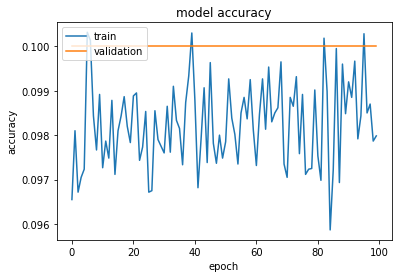

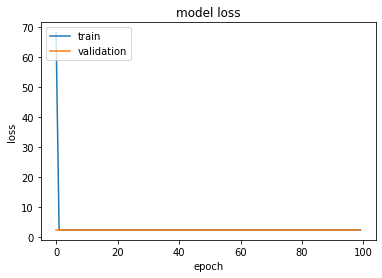

In [20]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Adam**

In [21]:
model = Sequential()
#Input Layer
model.add(Dense(16, activation='relu', input_dim=(784)))  #16 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 7s - loss: 1.5356 - accuracy: 0.4625 - val_loss: 0.9835 - val_accuracy: 0.5842 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.9132 - accuracy: 0.6322 - val_loss: 0.8601 - val_accuracy: 0.6548 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 6s - loss: 0.7766 - accuracy: 0.6919 - val_loss: 0.7064 - val_accuracy: 0.7139 - 6s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 6s - loss: 0.6928 - accuracy: 0.7222 - val_loss: 0.7442 - val_accuracy: 0.7259 - 6s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.6692 - accuracy: 0.7320 - val_loss: 0.6799 - val_accuracy: 0.7261 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.6450 - accuracy: 0.7368 - val_loss: 0.6348 - val_accuracy: 0.7420 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.6362 - accuracy: 0.7419 - val_loss: 0.6741 - val_accuracy: 0.7298 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss: 0.6275 - accuracy: 0.7410 - val_loss: 0.6239 - val_accuracy: 0.7480 - 6s/epoch - 3ms/step


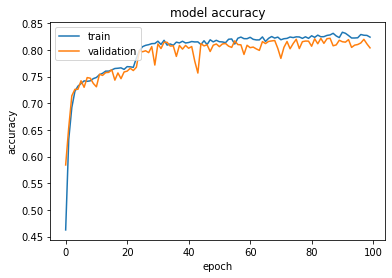

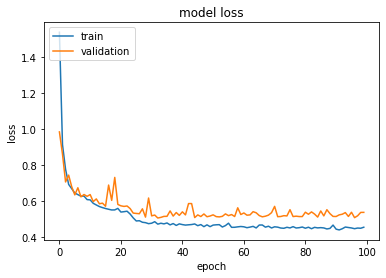

In [24]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
model = Sequential()
#Input Layer
model.add(Dense(32, activation='relu', input_dim=(784)))  #32 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 32 is added for 32 neurons
#784 x 32 = weights x neurons = 25,088 + 32 biases = 25120
#dense 32 x dense_1 32 + 32 biases = 1056
#dense_1 32 x dense_2 32 + 32 biases = 1056 
#dense_2 32 x dense_3 10 + 32 biases = 330
#Total Biases & Weights/Params = 27,562 are updated, each time in Backpropagation

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 7s - loss: 1.2311 - accuracy: 0.6435 - val_loss: 0.7054 - val_accuracy: 0.7403 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.6649 - accuracy: 0.7591 - val_loss: 0.5846 - val_accuracy: 0.7913 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 6s - loss: 0.6004 - accuracy: 0.7849 - val_loss: 0.5501 - val_accuracy: 0.8090 - 6s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 6s - loss: 0.5790 - accuracy: 0.7927 - val_loss: 0.5836 - val_accuracy: 0.7955 - 6s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.5479 - accuracy: 0.8016 - val_loss: 0.5218 - val_accuracy: 0.8120 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.5316 - accuracy: 0.8033 - val_loss: 0.5311 - val_accuracy: 0.8133 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.5152 - accuracy: 0.8095 - val_loss: 0.5937 - val_accuracy: 0.7879 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss: 0.5050 - accuracy: 0.8120 - val_loss: 0.5768 - val_accuracy: 0.7937 - 6s/epoch - 3ms/step


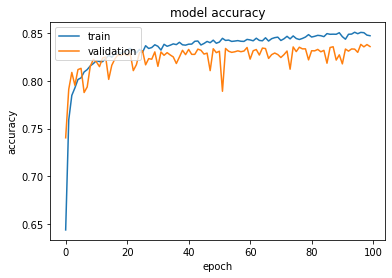

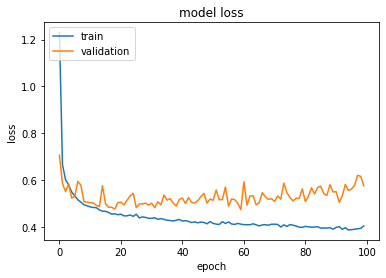

In [28]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
model = Sequential()
#Input Layer
model.add(Dense(64, activation='relu', input_dim=(784)))  #64 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 64 is added for 64 neurons
#784 x 64 = weights x neurons = 50,176 + 64 biases = 59,210
#dense 64 x dense_1 64 + 64 biases = 4160
#dense_1 64 x dense_2 64 + 64 biases = 4160 
#dense_2 64 x dense_3 10 + 64 biases = 650
#Total Biases & Weights/Params = 59,210 are updated, each time in Backpropagation

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 7s - loss: 1.3641 - accuracy: 0.7205 - val_loss: 0.6731 - val_accuracy: 0.7740 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.6000 - accuracy: 0.7925 - val_loss: 0.5955 - val_accuracy: 0.8027 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 6s - loss: 0.5146 - accuracy: 0.8187 - val_loss: 0.4990 - val_accuracy: 0.8290 - 6s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 6s - loss: 0.4805 - accuracy: 0.8309 - val_loss: 0.4612 - val_accuracy: 0.8431 - 6s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.4391 - accuracy: 0.8426 - val_loss: 0.4221 - val_accuracy: 0.8477 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.4165 - accuracy: 0.8485 - val_loss: 0.4276 - val_accuracy: 0.8471 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.4043 - accuracy: 0.8548 - val_loss: 0.4104 - val_accuracy: 0.8556 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss: 0.3892 - accuracy: 0.8583 - val_loss: 0.4208 - val_accuracy: 0.8503 - 6s/epoch - 3ms/step


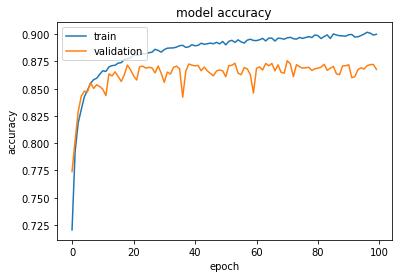

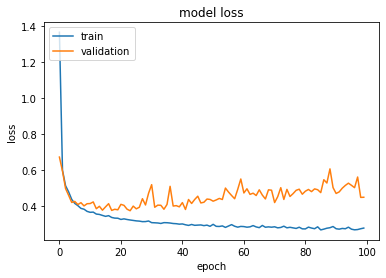

In [32]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
model = Sequential()
#Input Layer
model.add(Dense(128, activation='relu', input_dim=(784)))  #128 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dropout(0.2))  #Layer that drops neurons to avoid overfitting (20% neurons rate)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 128 is added for 128 neurons
#784 x 128 = weights x neurons = 100,352 + 128 biases = 100480
#dense 128 x dense_1 128 + 128 biases = 16512
#dense_1 128 x dense_2 128 + 128 biases = 16512 
#dense_2 128 x dense_3 10 + 128 biases = 1290
#Total Biases & Weights/Params = 134,794 are updated, each time in Backpropagation

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)               

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 7s - loss: 1.8857 - accuracy: 0.5492 - val_loss: 0.8056 - val_accuracy: 0.7079 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.9032 - accuracy: 0.6542 - val_loss: 0.7068 - val_accuracy: 0.7234 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 7s - loss: 0.8322 - accuracy: 0.6753 - val_loss: 0.6597 - val_accuracy: 0.7273 - 7s/epoch - 4ms/step
Epoch 4/100
1875/1875 - 6s - loss: 0.7826 - accuracy: 0.6928 - val_loss: 0.6487 - val_accuracy: 0.7335 - 6s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.7516 - accuracy: 0.7025 - val_loss: 0.7185 - val_accuracy: 0.7171 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.7230 - accuracy: 0.7123 - val_loss: 0.6247 - val_accuracy: 0.7428 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.6883 - accuracy: 0.7210 - val_loss: 0.6005 - val_accuracy: 0.7480 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 7s - loss: 0.6734 - accuracy: 0.7239 - val_loss: 0.5846 - val_accuracy: 0.7484 - 7s/epoch - 4ms/step


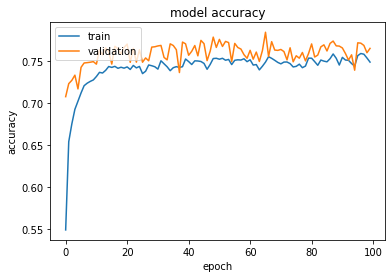

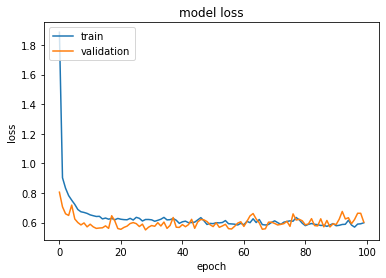

In [36]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
model = Sequential()
#Input Layer
model.add(Dense(256, activation='relu', input_dim=(784)))  #256 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dropout(0.2))  #Layer that drops neurons to avoid overfitting (20% neurons rate)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

#Extra biases of 256 is added for 256 neurons
#784 x 256 = weights x neurons = 200,704 + 256 biases = 200960
#dense 256 x dense_1 256 + 256 biases = 65792
#dense_1 256 x dense_2 256 + 256 biases = 65792 
#dense_2 256 x dense_3 10 + 256 biases = 2570
#Total Biases & Weights/Params = 335,114 are updated, each time in Backpropagation

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 10)               

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 7s - loss: 1.8760 - accuracy: 0.6336 - val_loss: 0.6923 - val_accuracy: 0.7096 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.7760 - accuracy: 0.6944 - val_loss: 0.6611 - val_accuracy: 0.7283 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 7s - loss: 0.7446 - accuracy: 0.7023 - val_loss: 0.6123 - val_accuracy: 0.7397 - 7s/epoch - 4ms/step
Epoch 4/100
1875/1875 - 7s - loss: 0.7267 - accuracy: 0.7119 - val_loss: 0.6055 - val_accuracy: 0.7579 - 7s/epoch - 4ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.6967 - accuracy: 0.7207 - val_loss: 0.6047 - val_accuracy: 0.7543 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.6694 - accuracy: 0.7287 - val_loss: 0.5667 - val_accuracy: 0.7510 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.6609 - accuracy: 0.7325 - val_loss: 0.5871 - val_accuracy: 0.7563 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss: 0.6599 - accuracy: 0.7343 - val_loss: 0.5964 - val_accuracy: 0.7523 - 6s/epoch - 3ms/step


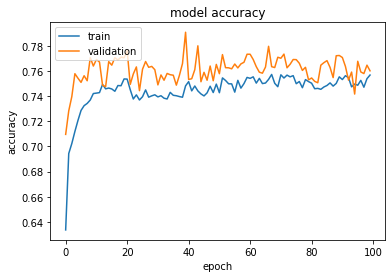

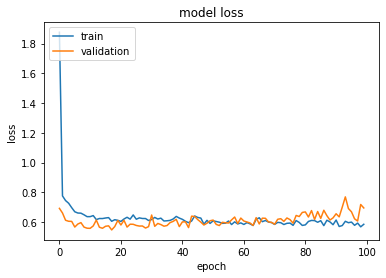

In [40]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
model = Sequential()
#Input Layer
model.add(Dense(256, activation='relu', input_dim=(784)))  #256 neurons
#We can add (28, 28, 3) for 3 dims data
#Hidden Layers
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
#Output Layer
model.add(Dense(10, activation='softmax'))  #10 classes (0-9), 'softmax' for multi-class logistic regression
#'softmax': Divides the probabilities into all claases such that their summation is equal to 1 & the class with max probability is considered as final output
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dense_27 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
hist = model.fit(X_train, y_train_tc, validation_data=(X_test, y_test_tc),epochs=100, verbose=2)

Epoch 1/100
1875/1875 - 7s - loss: 1.3641 - accuracy: 0.7681 - val_loss: 0.5783 - val_accuracy: 0.8116 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.4859 - accuracy: 0.8277 - val_loss: 0.4379 - val_accuracy: 0.8418 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 6s - loss: 0.4418 - accuracy: 0.8420 - val_loss: 0.4433 - val_accuracy: 0.8486 - 6s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 6s - loss: 0.4110 - accuracy: 0.8529 - val_loss: 0.4342 - val_accuracy: 0.8436 - 6s/epoch - 3ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.3869 - accuracy: 0.8628 - val_loss: 0.4121 - val_accuracy: 0.8539 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.3716 - accuracy: 0.8666 - val_loss: 0.3609 - val_accuracy: 0.8708 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.3663 - accuracy: 0.8690 - val_loss: 0.4542 - val_accuracy: 0.8508 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss: 0.3473 - accuracy: 0.8738 - val_loss: 0.3889 - val_accuracy: 0.8649 - 6s/epoch - 3ms/step


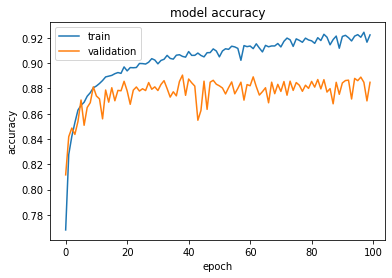

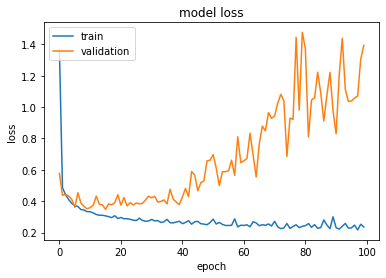

In [44]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
test_final = test.drop('label', axis=1)
preds_final = model.predict(test_final)
preds_final

array([[9.7678012e-01, 5.3832053e-11, 5.0262155e-05, ..., 0.0000000e+00,
        2.8703925e-10, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.9819852e-02, 8.6627068e-08, 9.0535700e-01, ..., 0.0000000e+00,
        5.5974239e-04, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [5.9573917e-13, 1.0667986e-24, 2.1186481e-15, ..., 7.6400240e-24,
        1.0000000e+00, 4.6113455e-28],
       [6.4675663e-07, 9.9982685e-01, 3.7344993e-08, ..., 0.0000000e+00,
        3.3752537e-16, 0.0000000e+00]], dtype=float32)

In [46]:
preds_final.shape

(10000, 10)

In [47]:
preds_final_class = pd.DataFrame(np.argmax(preds_final, axis=1))
preds_final_class

,0
0,0
1,1
2,2
3,6
4,3
...,...
9995,0
9996,6
9997,8
9998,8


In [48]:
preds_final_class['Label'] = test['label']
preds_final_class.columns = ['Predicted', 'Actual']
preds_final_class

,Predicted,Actual
0,0,0
1,1,1
2,2,2
3,6,2
4,3,3
...,...,...
9995,0,0
9996,6,6
9997,8,8
9998,8,8
